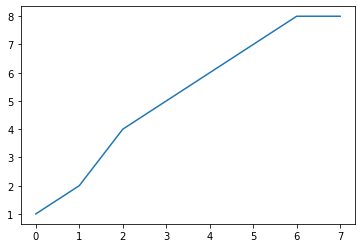

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,4,5,6,7,8,8])

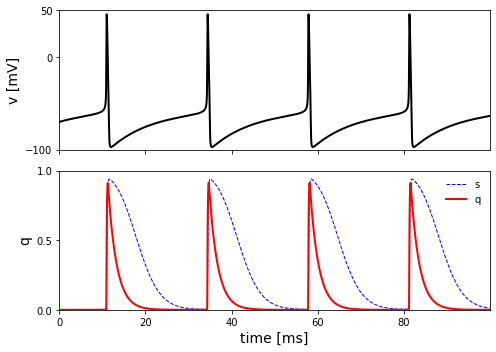

In [19]:
from scipy.integrate import odeint
import numpy as np
from numpy import exp
import pylab as pl


def alpha_h(v):
    return 0.128 * exp(-(v + 50.0) / 18.0)


def alpha_m(v):
    return 0.32 * (v + 54) / (1.0 - exp(-(v + 54.0) / 4.0))


def alpha_n(v):
    return 0.032 * (v + 52) / (1.0 - exp(-(v + 52.0) / 5.0))


def beta_h(v):
    return 4.0 / (1.0 + exp(-(v + 27.0) / 5.0))


def beta_m(v):
    return 0.28 * (v + 27.0) / (exp((v + 27.0) / 5.0) - 1.0)


def beta_n(v):
    return 0.5 * exp(-(v + 57.0) / 40.0)


def h_inf(v):
    return alpha_h(v) / (alpha_h(v) + beta_h(v))


def m_inf(v):
    return alpha_m(v) / (alpha_m(v) + beta_m(v))


def n_inf(v):
    return alpha_n(v) / (alpha_n(v) + beta_n(v))


def derivative(x0, t):
    '''
    define Traub Model
    '''
    v, m, n, h, q, s = x0

    dv = i_ext - g_na * h * m ** 3 * \
        (v - v_na) - g_k * n ** 4 * (v - v_k) - g_l * (v - v_l)
    dm = alpha_m(v) * (1.0 - m) - beta_m(v) * m
    dn = alpha_n(v) * (1.0 - n) - beta_n(v) * n
    dh = alpha_h(v) * (1.0 - h) - beta_h(v) * h
    dq = 0.5 * (1.0+np.tanh(0.1 * v)) * (1-q)/tau_r - q/tau_d
    ds = q * (1.0 - s) / tau_r - s / tau_d
    

    return [dv, dm, dn, dh, dq, ds]


def initial_condition(v):
    m = m_inf(v)
    h = h_inf(v)
    n = n_inf(v)
    s = 0.0
    q = 0.0
    return [v, m, n, h, q, s]

c = 1
g_k = 80.0
g_na = 100.0
g_l = 0.1
v_k = -100.0
v_na = 50.0
v_l = -67.0
i_ext = 1.0
t_final = 100.0
dt = 0.01
v = -70.0

if __name__ == "__main__":

    tau_r = 0.1
    tau_d = 2.0
    x0 = initial_condition(v)
    t = np.arange(0, t_final, dt)
    sol = odeint(derivative, x0, t)
    V = sol[:, 0]
    Q = sol[:, 4]
    S = sol[:, 5]


    fig, ax = pl.subplots(2, figsize=(7, 5), sharex=True)
    ax[0].plot(t, V, lw=2, c="k")
    ax[1].plot(t, S, lw=1, c="b", ls="--", label="s")
    ax[1].plot(t, Q, lw=2, c="r", label="q")

    ax[0].set_xlim(min(t), max(t))
    ax[0].set_ylim(-100, 100)
    ax[1].set_ylim([0, 1])
    ax[1].set_xlabel("time [ms]", fontsize=14)
    ax[0].set_ylabel("v [mV]", fontsize=14)
    ax[1].set_ylabel("q", fontsize=14)
    ax[0].set_yticks([-100, 0, 50])
    ax[0].set_ylim(-100, 50)
    ax[1].set_yticks([0, 0.5, 1])
    ax[1].legend(frameon=False)
    

    pl.tight_layout()
    pl.show()